In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.svm import SVR
plt.style.use('bmh')
from sklearn.cluster import KMeans
wcss=[]

df = pd.read_csv("Behavioral_Risk_Factor_Surveillance_System__BRFSS__-__National_Cardiovascular_Disease_Surveillance_Data.csv") 

In [2]:
#Clean the dataset

df.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                    42989
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    72971
Data_Value_Footnote           72971
LowConfidenceLimit            44783
HighConfidenceLimit           44783
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

In [3]:
#filter the dataset column-wise

filtered_df = df[["Year","LocationDesc","Category",
                  "Topic","Indicator","Data_Value_Type","Data_Value_Unit",
                  "Data_Value","LowConfidenceLimit","HighConfidenceLimit","Break_Out_Category"]]
filtered_df.head(5)

Year LocationDesc                 Category                         Topic  \
0  2011      Alabama  Cardiovascular Diseases                        Stroke   
1  2011      Alabama  Cardiovascular Diseases  Major Cardiovascular Disease   
2  2011      Alabama  Cardiovascular Diseases  Major Cardiovascular Disease   
3  2011      Alabama  Cardiovascular Diseases  Major Cardiovascular Disease   
4  2011      Alabama  Cardiovascular Diseases  Major Cardiovascular Disease   

                                           Indicator   Data_Value_Type  \
0  Prevalence of stroke among US adults (18+); BRFSS             Crude   
1  Prevalence of major cardiovascular disease amo...  Age-Standardized   
2  Prevalence of major cardiovascular disease amo...  Age-Standardized   
3  Prevalence of major cardiovascular disease amo...             Crude   
4  Prevalence of major cardiovascular disease amo...             Crude   

  Data_Value_Unit  Data_Value  LowConfidenceLimit  HighConfidenceLimit  \
0     Percent (%)         4.4                 3.8                  5.1   
1     Percent (%)         9.9                 9.2                 10.7   
2     Percent (%)         9.7                 5.8                 15.8   
3     Percent (%)        30.7                27.3                 34.2   
4     Percent (%)        15.2                14.1                 16.4   

  Break_Out_Category  
0             Gender  
1            Overall  
2               Race  
3                Age  
4                Age

In [4]:
filtered_df.isna().sum()

Year                       0
LocationDesc               0
Category                   0
Topic                      0
Indicator                  0
Data_Value_Type            0
Data_Value_Unit            0
Data_Value             42989
LowConfidenceLimit     44783
HighConfidenceLimit    44783
Break_Out_Category         0
dtype: int64

In [5]:
filtered_df = filtered_df.dropna

In [6]:
filtered_df = df[["Year","LocationDesc","Category","Topic","Indicator",
                  "Data_Value_Type","Data_Value_Unit","Data_Value","LowConfidenceLimit",
                  "HighConfidenceLimit","Break_Out_Category"]]
filtered_df

Year LocationDesc                 Category  \
0       2011      Alabama  Cardiovascular Diseases   
1       2011      Alabama  Cardiovascular Diseases   
2       2011      Alabama  Cardiovascular Diseases   
3       2011      Alabama  Cardiovascular Diseases   
4       2011      Alabama  Cardiovascular Diseases   
...      ...          ...                      ...   
115955  2017      Wyoming             Risk Factors   
115956  2017      Wyoming             Risk Factors   
115957  2017      Wyoming             Risk Factors   
115958  2017      Wyoming             Risk Factors   
115959  2017      Wyoming             Risk Factors   

                               Topic  \
0                             Stroke   
1       Major Cardiovascular Disease   
2       Major Cardiovascular Disease   
3       Major Cardiovascular Disease   
4       Major Cardiovascular Disease   
...                              ...   
115955                  Hypertension   
115956                  Hypertension   
115957                  Hypertension   
115958                  Hypertension   
115959                  Hypertension   

                                                Indicator   Data_Value_Type  \
0       Prevalence of stroke among US adults (18+); BRFSS             Crude   
1       Prevalence of major cardiovascular disease amo...  Age-Standardized   
2       Prevalence of major cardiovascular disease amo...  Age-Standardized   
3       Prevalence of major cardiovascular disease amo...             Crude   
4       Prevalence of major cardiovascular disease amo...             Crude   
...                                                   ...               ...   
115955  Prevalence of hypertension medication use amon...             Crude   
115956  Prevalence of hypertension medication use amon...             Crude   
115957  Prevalence of hypertension medication use amon...             Crude   
115958  Prevalence of hypertension medication use amon...  Age-Standardized   
115959  Prevalence of hypertension medication use amon...             Crude   

       Data_Value_Unit  Data_Value  LowConfidenceLimit  HighConfidenceLimit  \
0          Percent (%)         4.4                 3.8                  5.1   
1          Percent (%)         9.9                 9.2                 10.7   
2          Percent (%)         9.7                 5.8                 15.8   
3          Percent (%)        30.7                27.3                 34.2   
4          Percent (%)        15.2                14.1                 16.4   
...                ...         ...                 ...                  ...   
115955     Percent (%)        78.4                74.3                 81.9   
115956     Percent (%)        64.0                51.2                 75.0   
115957     Percent (%)         NaN                 NaN                  NaN   
115958     Percent (%)        49.0                44.5                 53.6   
115959     Percent (%)        78.1                75.4                 80.6   

       Break_Out_Category  
0                  Gender  
1                 Overall  
2                    Race  
3                     Age  
4                     Age  
...                   ...  
115955                Age  
115956               Race  
115957               Race  
115958             Gender  
115959                Age  

[115960 rows x 11 columns]

In [7]:
filtered_df.isnull().sum()

Year                       0
LocationDesc               0
Category                   0
Topic                      0
Indicator                  0
Data_Value_Type            0
Data_Value_Unit            0
Data_Value             42989
LowConfidenceLimit     44783
HighConfidenceLimit    44783
Break_Out_Category         0
dtype: int64

In [8]:
#drop null/missing values from all the rows

filtered_df = filtered_df.dropna()

In [9]:
filtered_df.isnull().sum()

Year                   0
LocationDesc           0
Category               0
Topic                  0
Indicator              0
Data_Value_Type        0
Data_Value_Unit        0
Data_Value             0
LowConfidenceLimit     0
HighConfidenceLimit    0
Break_Out_Category     0
dtype: int64

In [10]:
filtered_df.isna().sum()

Year                   0
LocationDesc           0
Category               0
Topic                  0
Indicator              0
Data_Value_Type        0
Data_Value_Unit        0
Data_Value             0
LowConfidenceLimit     0
HighConfidenceLimit    0
Break_Out_Category     0
dtype: int64

In [11]:
#filter the column Topic for Cardiovascular diseases

relevantTopic=["Major Cardiovascular Disease","Acute Myocardial Infarction (Heart Attack)",
               "Coronary Heart Disease","Hypertension"]
filtered_topic = filtered_df.Topic.isin(relevantTopic)

In [12]:
filtered_df[filtered_topic]

Year LocationDesc                 Category  \
1       2011      Alabama  Cardiovascular Diseases   
2       2011      Alabama  Cardiovascular Diseases   
3       2011      Alabama  Cardiovascular Diseases   
4       2011      Alabama  Cardiovascular Diseases   
6       2011      Alabama  Cardiovascular Diseases   
...      ...          ...                      ...   
115954  2017      Wyoming             Risk Factors   
115955  2017      Wyoming             Risk Factors   
115956  2017      Wyoming             Risk Factors   
115958  2017      Wyoming             Risk Factors   
115959  2017      Wyoming             Risk Factors   

                               Topic  \
1       Major Cardiovascular Disease   
2       Major Cardiovascular Disease   
3       Major Cardiovascular Disease   
4       Major Cardiovascular Disease   
6       Major Cardiovascular Disease   
...                              ...   
115954                  Hypertension   
115955                  Hypertension   
115956                  Hypertension   
115958                  Hypertension   
115959                  Hypertension   

                                                Indicator   Data_Value_Type  \
1       Prevalence of major cardiovascular disease amo...  Age-Standardized   
2       Prevalence of major cardiovascular disease amo...  Age-Standardized   
3       Prevalence of major cardiovascular disease amo...             Crude   
4       Prevalence of major cardiovascular disease amo...             Crude   
6       Prevalence of major cardiovascular disease amo...             Crude   
...                                                   ...               ...   
115954  Prevalence of hypertension medication use amon...  Age-Standardized   
115955  Prevalence of hypertension medication use amon...             Crude   
115956  Prevalence of hypertension medication use amon...             Crude   
115958  Prevalence of hypertension medication use amon...  Age-Standardized   
115959  Prevalence of hypertension medication use amon...             Crude   

       Data_Value_Unit  Data_Value  LowConfidenceLimit  HighConfidenceLimit  \
1          Percent (%)         9.9                 9.2                 10.7   
2          Percent (%)         9.7                 5.8                 15.8   
3          Percent (%)        30.7                27.3                 34.2   
4          Percent (%)        15.2                14.1                 16.4   
6          Percent (%)        11.5                10.5                 12.6   
...                ...         ...                 ...                  ...   
115954     Percent (%)        53.2                29.8                 75.3   
115955     Percent (%)        78.4                74.3                 81.9   
115956     Percent (%)        64.0                51.2                 75.0   
115958     Percent (%)        49.0                44.5                 53.6   
115959     Percent (%)        78.1                75.4                 80.6   

       Break_Out_Category  
1                 Overall  
2                    Race  
3                     Age  
4                     Age  
6                    Race  
...                   ...  
115954               Race  
115955                Age  
115956               Race  
115958             Gender  
115959                Age  

[25004 rows x 11 columns]

In [13]:
#filter the columns for data value type = Age-standardized

filtered_dataValueType = filtered_df.Data_Value_Type.isin(["Age-Standardized"])

In [14]:
filtered_df[filtered_dataValueType]

Year LocationDesc                 Category  \
1       2011      Alabama  Cardiovascular Diseases   
2       2011      Alabama  Cardiovascular Diseases   
8       2011      Alabama  Cardiovascular Diseases   
9       2011      Alabama  Cardiovascular Diseases   
10      2011      Alabama  Cardiovascular Diseases   
...      ...          ...                      ...   
115948  2017      Wyoming             Risk Factors   
115951  2017      Wyoming             Risk Factors   
115953  2017      Wyoming             Risk Factors   
115954  2017      Wyoming             Risk Factors   
115958  2017      Wyoming             Risk Factors   

                               Topic  \
1       Major Cardiovascular Disease   
2       Major Cardiovascular Disease   
8       Major Cardiovascular Disease   
9       Major Cardiovascular Disease   
10      Major Cardiovascular Disease   
...                              ...   
115948                  Hypertension   
115951                  Hypertension   
115953                  Hypertension   
115954                  Hypertension   
115958                  Hypertension   

                                                Indicator   Data_Value_Type  \
1       Prevalence of major cardiovascular disease amo...  Age-Standardized   
2       Prevalence of major cardiovascular disease amo...  Age-Standardized   
8       Prevalence of major cardiovascular disease amo...  Age-Standardized   
9       Prevalence of major cardiovascular disease amo...  Age-Standardized   
10      Prevalence of major cardiovascular disease amo...  Age-Standardized   
...                                                   ...               ...   
115948  Prevalence of hypertension medication use amon...  Age-Standardized   
115951  Prevalence of hypertension medication use amon...  Age-Standardized   
115953  Prevalence of hypertension medication use amon...  Age-Standardized   
115954  Prevalence of hypertension medication use amon...  Age-Standardized   
115958  Prevalence of hypertension medication use amon...  Age-Standardized   

       Data_Value_Unit  Data_Value  LowConfidenceLimit  HighConfidenceLimit  \
1          Percent (%)         9.9                 9.2                 10.7   
2          Percent (%)         9.7                 5.8                 15.8   
8          Percent (%)        16.8                10.0                 26.8   
9          Percent (%)        11.8                10.6                 13.2   
10         Percent (%)         8.3                 7.5                  9.1   
...                ...         ...                 ...                  ...   
115948     Percent (%)        50.6                40.4                 60.8   
115951     Percent (%)        52.4                48.2                 56.6   
115953     Percent (%)        59.7                51.4                 67.5   
115954     Percent (%)        53.2                29.8                 75.3   
115958     Percent (%)        49.0                44.5                 53.6   

       Break_Out_Category  
1                 Overall  
2                    Race  
8                    Race  
9                  Gender  
10                 Gender  
...                   ...  
115948               Race  
115951               Race  
115953             Gender  
115954               Race  
115958             Gender  

[23668 rows x 11 columns]

In [15]:
#filter the columns for BreakOutCategory = Overall

filtered_BreakOutCategory = filtered_df.Break_Out_Category.isin(["Overall"])

In [16]:
filtered_df[filtered_BreakOutCategory]

Year LocationDesc                 Category  \
1       2011      Alabama  Cardiovascular Diseases   
11      2011      Alabama  Cardiovascular Diseases   
24      2011      Alabama  Cardiovascular Diseases   
37      2011      Alabama  Cardiovascular Diseases   
79      2011      Alabama  Cardiovascular Diseases   
...      ...          ...                      ...   
115909  2017      Wyoming             Risk Factors   
115930  2017      Wyoming             Risk Factors   
115935  2017      Wyoming             Risk Factors   
115938  2017      Wyoming             Risk Factors   
115945  2017      Wyoming             Risk Factors   

                                             Topic  \
1                     Major Cardiovascular Disease   
11                    Major Cardiovascular Disease   
24      Acute Myocardial Infarction (Heart Attack)   
37      Acute Myocardial Infarction (Heart Attack)   
79                          Coronary Heart Disease   
...                                            ...   
115909                                     Smoking   
115930                                Hypertension   
115935                                Hypertension   
115938                                Hypertension   
115945                                Hypertension   

                                                Indicator   Data_Value_Type  \
1       Prevalence of major cardiovascular disease amo...  Age-Standardized   
11      Prevalence of major cardiovascular disease amo...             Crude   
24      Prevalence of acute myocardial infarction (hea...  Age-Standardized   
37      Prevalence of acute myocardial infarction (hea...             Crude   
79      Prevalence of coronary heart disease among US ...             Crude   
...                                                   ...               ...   
115909  Prevalence of current smoking among US adults ...             Crude   
115930  Prevalence of hypertension among US adults (18...             Crude   
115935  Prevalence of hypertension among US adults (18...  Age-Standardized   
115938  Prevalence of hypertension medication use amon...             Crude   
115945  Prevalence of hypertension medication use amon...  Age-Standardized   

       Data_Value_Unit  Data_Value  LowConfidenceLimit  HighConfidenceLimit  \
1          Percent (%)         9.9                 9.2                 10.7   
11         Percent (%)        11.0                10.2                 11.9   
24         Percent (%)         4.5                 4.0                  5.1   
37         Percent (%)         5.0                 4.5                  5.7   
79         Percent (%)         5.5                 4.9                  6.2   
...                ...         ...                 ...                  ...   
115909     Percent (%)        18.7                17.2                 20.3   
115930     Percent (%)        30.8                29.2                 32.4   
115935     Percent (%)        28.6                27.1                 30.1   
115938     Percent (%)        71.7                68.7                 74.6   
115945     Percent (%)        52.7                48.9                 56.6   

       Break_Out_Category  
1                 Overall  
11                Overall  
24                Overall  
37                Overall  
79                Overall  
...                   ...  
115909            Overall  
115930            Overall  
115935            Overall  
115938            Overall  
115945            Overall  

[7820 rows x 11 columns]

In [17]:
#filter the column Category = Cardiovascular diseases

filtered_Category = filtered_df.Category.isin(["Cardiovascular Diseases"])

In [18]:
#apply all the filters to one dataframe (filtered_topic, filtered_dataValueType, filtered_BreakOutCategory)

all_filter_df = filtered_topic & filtered_dataValueType & filtered_BreakOutCategory & filtered_Category
final_df = filtered_df[all_filter_df]
final_df


Year LocationDesc                 Category  \
1       2011      Alabama  Cardiovascular Diseases   
24      2011      Alabama  Cardiovascular Diseases   
87      2011      Alabama  Cardiovascular Diseases   
348     2012      Alabama  Cardiovascular Diseases   
365     2012      Alabama  Cardiovascular Diseases   
...      ...          ...                      ...   
115413  2016      Wyoming  Cardiovascular Diseases   
115461  2016      Wyoming  Cardiovascular Diseases   
115688  2017      Wyoming  Cardiovascular Diseases   
115708  2017      Wyoming  Cardiovascular Diseases   
115758  2017      Wyoming  Cardiovascular Diseases   

                                             Topic  \
1                     Major Cardiovascular Disease   
24      Acute Myocardial Infarction (Heart Attack)   
87                          Coronary Heart Disease   
348                   Major Cardiovascular Disease   
365     Acute Myocardial Infarction (Heart Attack)   
...                                            ...   
115413  Acute Myocardial Infarction (Heart Attack)   
115461                      Coronary Heart Disease   
115688                Major Cardiovascular Disease   
115708  Acute Myocardial Infarction (Heart Attack)   
115758                      Coronary Heart Disease   

                                                Indicator   Data_Value_Type  \
1       Prevalence of major cardiovascular disease amo...  Age-Standardized   
24      Prevalence of acute myocardial infarction (hea...  Age-Standardized   
87      Prevalence of coronary heart disease among US ...  Age-Standardized   
348     Prevalence of major cardiovascular disease amo...  Age-Standardized   
365     Prevalence of acute myocardial infarction (hea...  Age-Standardized   
...                                                   ...               ...   
115413  Prevalence of acute myocardial infarction (hea...  Age-Standardized   
115461  Prevalence of coronary heart disease among US ...  Age-Standardized   
115688  Prevalence of major cardiovascular disease amo...  Age-Standardized   
115708  Prevalence of acute myocardial infarction (hea...  Age-Standardized   
115758  Prevalence of coronary heart disease among US ...  Age-Standardized   

       Data_Value_Unit  Data_Value  LowConfidenceLimit  HighConfidenceLimit  \
1          Percent (%)         9.9                 9.2                 10.7   
24         Percent (%)         4.5                 4.0                  5.1   
87         Percent (%)         5.0                 4.4                  5.6   
348        Percent (%)        10.4                 9.7                 11.2   
365        Percent (%)         5.1                 4.6                  5.7   
...                ...         ...                 ...                  ...   
115413     Percent (%)         3.7                 3.1                  4.5   
115461     Percent (%)         3.3                 2.8                  4.0   
115688     Percent (%)         7.1                 6.4                  8.0   
115708     Percent (%)         4.0                 3.5                  4.7   
115758     Percent (%)         3.2                 2.7                  3.8   

       Break_Out_Category  
1                 Overall  
24                Overall  
87                Overall  
348               Overall  
365               Overall  
...                   ...  
115413            Overall  
115461            Overall  
115688            Overall  
115708            Overall  
115758            Overall  

[1095 rows x 11 columns]

In [19]:
list_of_states = np.array(np.unique(filtered_df["LocationDesc"]))
print(list_of_states)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'Washington, DC' 'West Virginia'
 'Wisconsin' 'Wyoming']


In [20]:
list_of_years = np.array(np.unique(filtered_df["Year"]))
print(list_of_years)

[2011 2012 2013 2014 2015 2016 2017]


In [21]:
rows = []

for state in list_of_states:
    #print(state)
    for year in list_of_years:
       # print(year)
        prevalence_percent = 0
        filter = filtered_df.LocationDesc.isin([state]) & filtered_df.Year.isin([year]) & all_filter_df
        for index, row in filtered_df[filter].iterrows():
            #print(row['Data_Value'])
            prevalence_percent += float(row['Data_Value'])
        #print("year ", year ,"loop is complete. Prevalance % for that year is ", prevalence_percent)
        rows.append([state , year, prevalence_percent])
    #print("state ", state ,"loop is complete")   
        
final_df = pd.DataFrame(rows , columns=["States", "Year", "%_Prevalence"])
final_df

States  Year  %_Prevalence
0    Alabama  2011          19.4
1    Alabama  2012          20.4
2    Alabama  2013          20.6
3    Alabama  2014          20.3
4    Alabama  2015          18.9
..       ...   ...           ...
352  Wyoming  2013          14.9
353  Wyoming  2014          14.2
354  Wyoming  2015          13.5
355  Wyoming  2016          14.0
356  Wyoming  2017          14.3

[357 rows x 3 columns]

In [22]:
# plot the % prevalence of heart disease for each state from 2011-2017

fig = go.Figure(data=go.Scatter(x=final_df['States'],
                                y=final_df['%_Prevalence'],
                                mode='markers',
                                marker_color=final_df['%_Prevalence'],
                                text=final_df['Year'])) # hover text goes here

fig.update_layout(title='Percent prevalence of Heart Disease from 2011-2017')
fig.show()

In [23]:
#Extract the total population of each state in US

df_population = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv')
df_population.head()
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SUMLEV             53 non-null     int64  
 1   REGION             53 non-null     object 
 2   DIVISION           53 non-null     object 
 3   STATE              53 non-null     int64  
 4   NAME               53 non-null     object 
 5   POPESTIMATE2019    53 non-null     int64  
 6   POPEST18PLUS2019   53 non-null     int64  
 7   PCNT_POPEST18PLUS  53 non-null     float64
dtypes: float64(1), int64(4), object(3)
memory usage: 3.4+ KB


In [24]:
#Extract the total no of hospitals with the number of hospital bed in each state

df_hospitals = pd.read_csv('hospital.csv')
df_hospitals.head()
df_hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                56 non-null     object 
 1   Number of Hospitals  56 non-null     float64
 2   Staffed Beds         56 non-null     object 
 3   Total Discharges     56 non-null     object 
 4   Patient Days         56 non-null     object 
 5   Gross Patient        56 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.8+ KB


before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Alabama for 2020 is 20.139999999955762
Total population in Alabama is 4903185 
Vulnerable population in Alabama is 503625
Total hospital beds in Alabama is 15,542


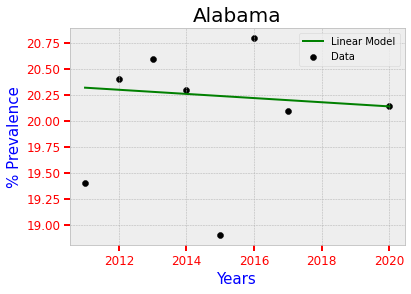

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Alaska for 2020 is 10.399999999834108
Total population in Alaska is 731545 
Vulnerable population in Alaska is 38801
Total hospital beds in Alaska is 1,235


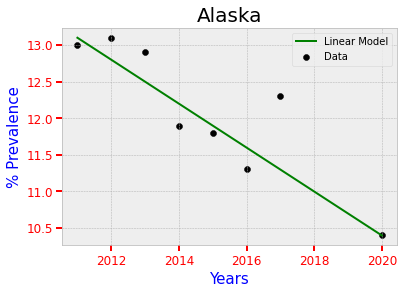

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Arizona for 2020 is 12.699999999580541
Total population in Arizona is 7278717 
Vulnerable population in Arizona is 471442
Total hospital beds in Arizona is 13,296


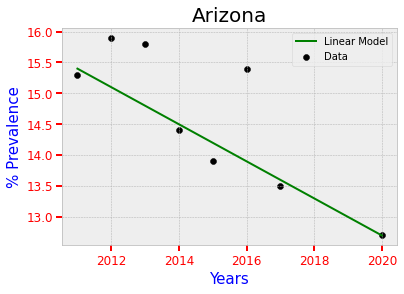

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Arkansas for 2020 is 22.43999999962557
Total population in Arkansas is 3017804 
Vulnerable population in Arkansas is 345369
Total hospital beds in Arkansas is 7,848


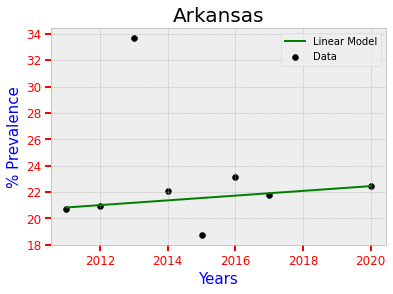

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for California for 2020 is 10.49999999039153
Total population in California is 39512223 
Vulnerable population in California is 2115879
Total hospital beds in California is 74,186


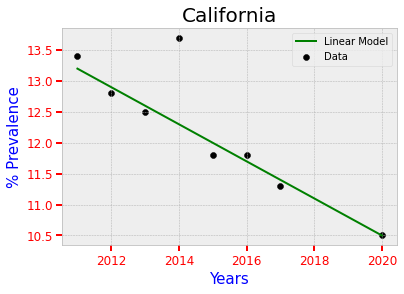

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Colorado for 2020 is 11.95000000031439
Total population in Colorado is 5758736 
Vulnerable population in Colorado is 350966
Total hospital beds in Colorado is 8,243


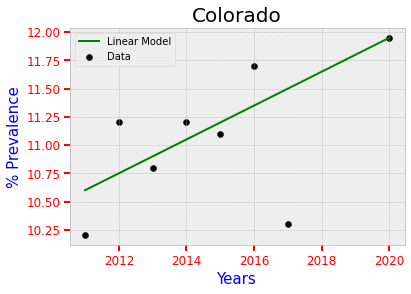

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Connecticut for 2020 is 12.180000000259838
Total population in Connecticut is 3565287 
Vulnerable population in Connecticut is 221468
Total hospital beds in Connecticut is 8,847


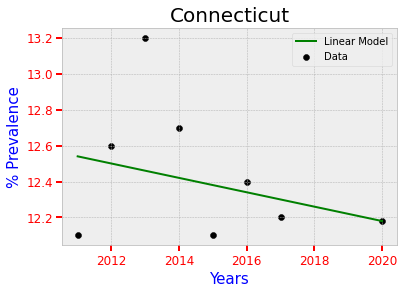

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Delaware for 2020 is 13.833333331684912
Total population in Delaware is 973764 
Vulnerable population in Delaware is 68699
Total hospital beds in Delaware is 2,072


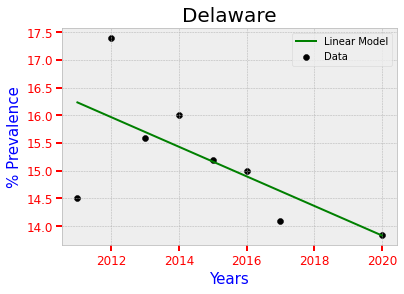

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Florida for 2020 is 14.50000000108389
Total population in Florida is 21477737 
Vulnerable population in Florida is 1588278
Total hospital beds in Florida is 55,727


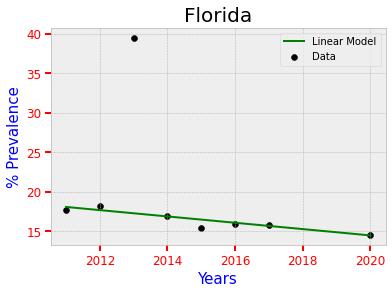

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Georgia for 2020 is 17.29999999984102
Total population in Georgia is 10617423 
Vulnerable population in Georgia is 936775
Total hospital beds in Georgia is 22,344


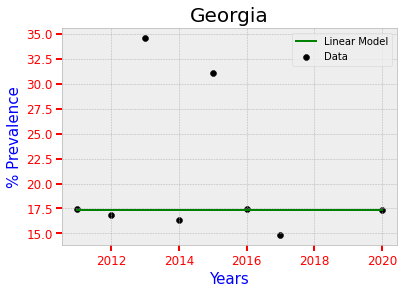

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Hawaii for 2020 is 11.20000000013465
Total population in Hawaii is 1415872 
Vulnerable population in Hawaii is 80874
Total hospital beds in Hawaii is 2,583


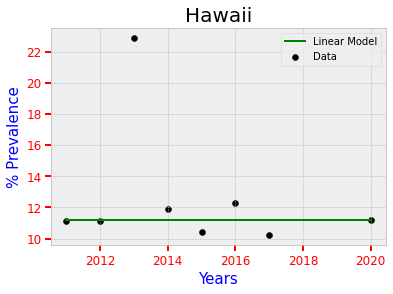

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Idaho for 2020 is 12.780000000051587
Total population in Idaho is 1787065 
Vulnerable population in Idaho is 116477
Total hospital beds in Idaho is 2,470


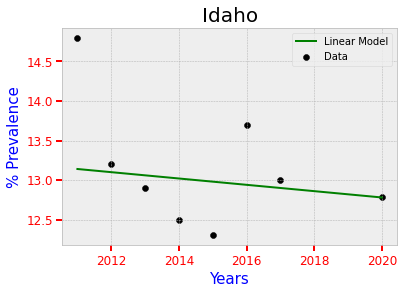

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Illinois for 2020 is 12.300000001232547
Total population in Illinois is 12671821 
Vulnerable population in Illinois is 794903
Total hospital beds in Illinois is 28,953


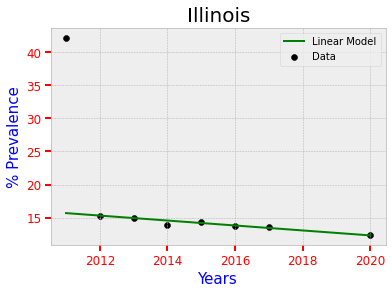

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Indiana for 2020 is 16.33999999983348
Total population in Indiana is 6732219 
Vulnerable population in Indiana is 561022
Total hospital beds in Indiana is 16,084


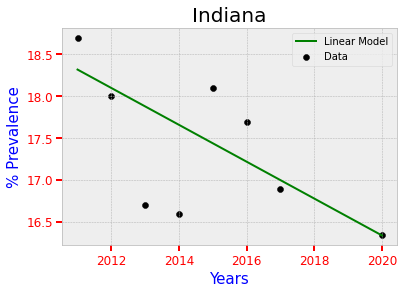

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Iowa for 2020 is 40.29999999999927
Total population in Iowa is 3155070 
Vulnerable population in Iowa is 648461
Total hospital beds in Iowa is 6,266


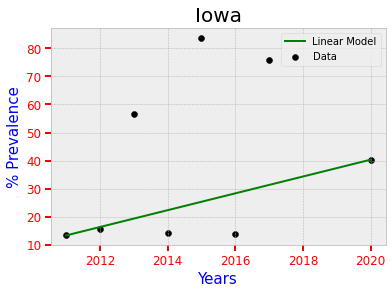

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Kansas for 2020 is 13.199999999389888
Total population in Kansas is 2913314 
Vulnerable population in Kansas is 196124
Total hospital beds in Kansas is 6,466


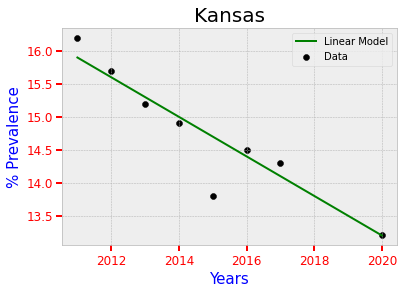

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Kentucky for 2020 is 22.74999999967406
Total population in Kentucky is 4467673 
Vulnerable population in Kentucky is 518361
Total hospital beds in Kentucky is 13,799


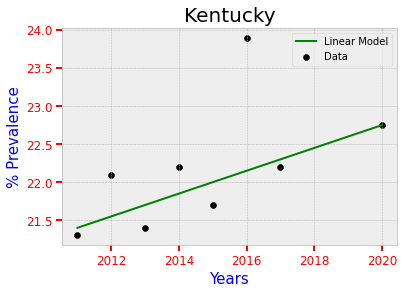

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Louisiana for 2020 is 19.42499999985648
Total population in Louisiana is 4648794 
Vulnerable population in Louisiana is 460544
Total hospital beds in Louisiana is 14,989


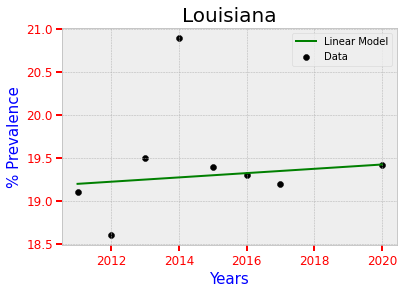

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Maine for 2020 is 15.200000000947284
Total population in Maine is 1344212 
Vulnerable population in Maine is 104203
Total hospital beds in Maine is 2,893


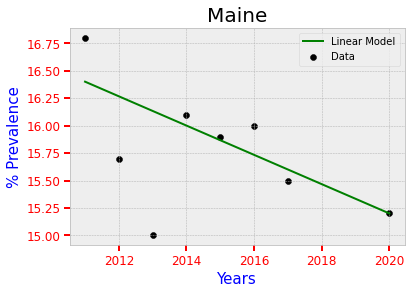

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Maryland for 2020 is 11.919999999417655
Total population in Maryland is 6045680 
Vulnerable population in Maryland is 367528
Total hospital beds in Maryland is 10,806


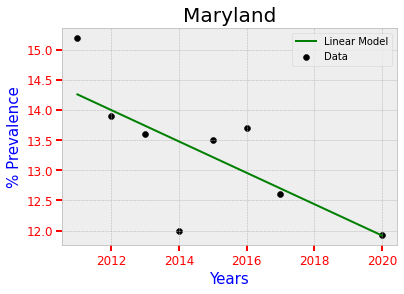

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Massachusetts for 2020 is 13.400000001128774
Total population in Massachusetts is 6892503 
Vulnerable population in Massachusetts is 471033
Total hospital beds in Massachusetts is 15,193


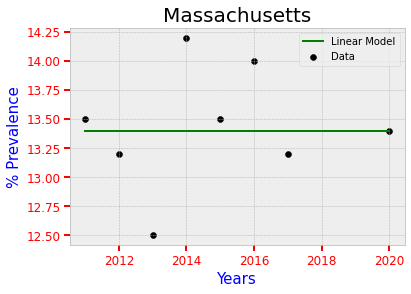

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Michigan for 2020 is 17.00000000008731
Total population in Michigan is 9986857 
Vulnerable population in Michigan is 865860
Total hospital beds in Michigan is 23,819


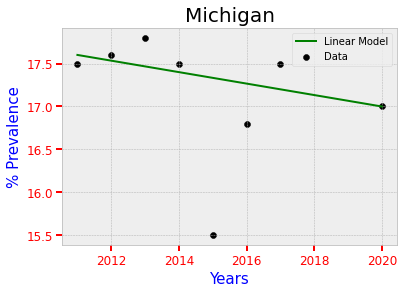

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Minnesota for 2020 is 10.799999988113996
Total population in Minnesota is 5639632 
Vulnerable population in Minnesota is 310630
Total hospital beds in Minnesota is 10,518


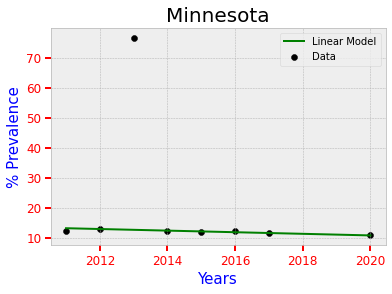

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Mississippi for 2020 is 20.050000001072135
Total population in Mississippi is 2976149 
Vulnerable population in Mississippi is 304326
Total hospital beds in Mississippi is 9,970


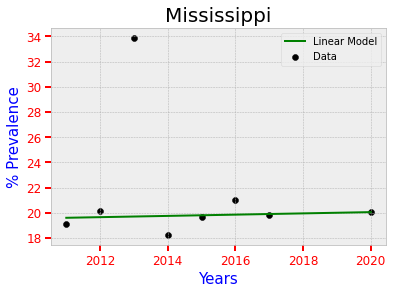

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Missouri for 2020 is 17.32500000046059
Total population in Missouri is 6137428 
Vulnerable population in Missouri is 542287
Total hospital beds in Missouri is 16,712


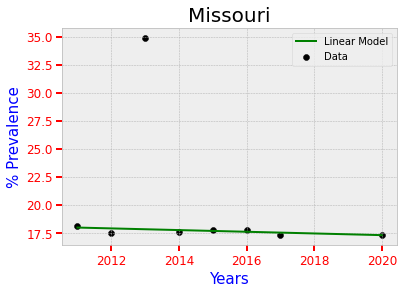

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Montana for 2020 is 10.350000001023204
Total population in Montana is 1068778 
Vulnerable population in Montana is 56415
Total hospital beds in Montana is 2,202


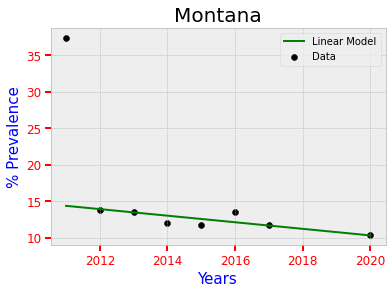

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Nebraska for 2020 is 13.099999999534248
Total population in Nebraska is 1934408 
Vulnerable population in Nebraska is 129237
Total hospital beds in Nebraska is 4,225


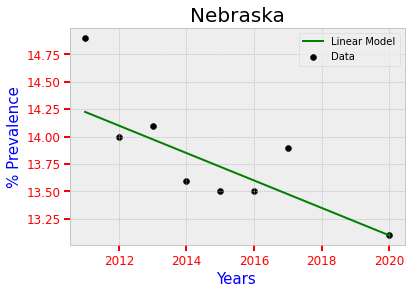

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Nevada for 2020 is 15.700000000136356
Total population in Nevada is 3080156 
Vulnerable population in Nevada is 246628
Total hospital beds in Nevada is 5,726


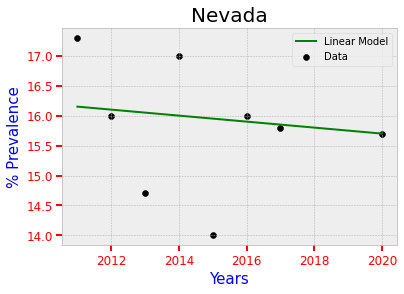

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for New Hampshire for 2020 is 10.300000000879436
Total population in New Hampshire is 1359711 
Vulnerable population in New Hampshire is 71425
Total hospital beds in New Hampshire is 2,266


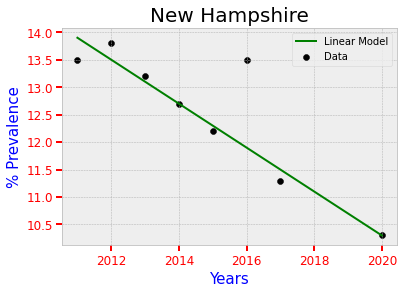

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for New Jersey for 2020 is 12.074999999665351
Total population in New Jersey is 8882190 
Vulnerable population in New Jersey is 546987
Total hospital beds in New Jersey is 20,207


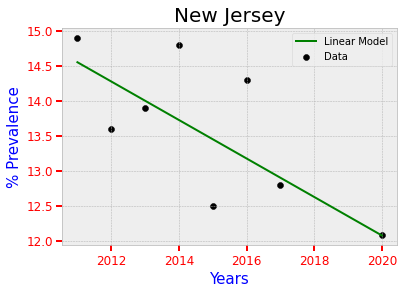

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for New Mexico for 2020 is 12.800000000435034
Total population in New Mexico is 2096829 
Vulnerable population in New Mexico is 136880
Total hospital beds in New Mexico is 3,917


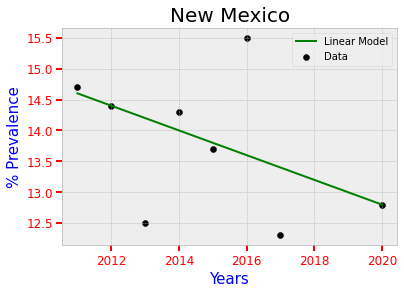

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for New York for 2020 is 12.799999999494275
Total population in New York is 19453561 
Vulnerable population in New York is 1269928
Total hospital beds in New York is 57,261


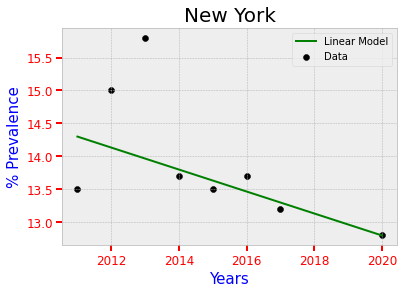

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for North Carolina for 2020 is 14.850000001075728
Total population in North Carolina is 10488084 
Vulnerable population in North Carolina is 794315
Total hospital beds in North Carolina is 23,194


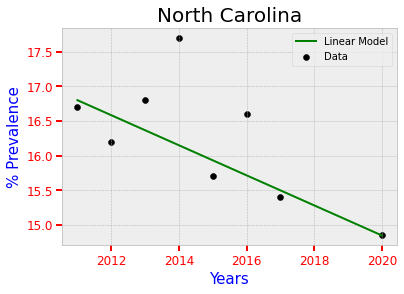

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for North Dakota for 2020 is 14.399999999544434
Total population in North Dakota is 762062 
Vulnerable population in North Dakota is 55965
Total hospital beds in North Dakota is 2,003


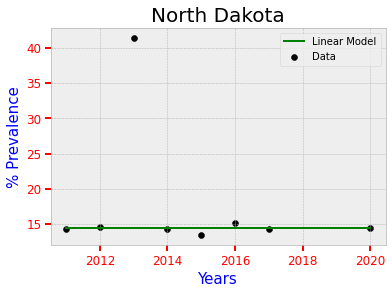

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Ohio for 2020 is 16.05999999963899
Total population in Ohio is 11689100 
Vulnerable population in Ohio is 957407
Total hospital beds in Ohio is 27,185


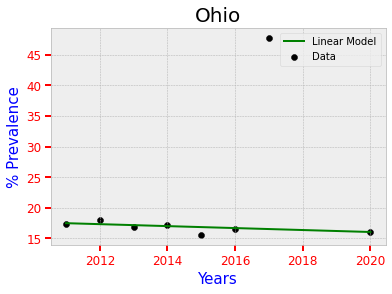

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Oklahoma for 2020 is 19.60000000054839
Total population in Oklahoma is 3956971 
Vulnerable population in Oklahoma is 395538
Total hospital beds in Oklahoma is 10,312


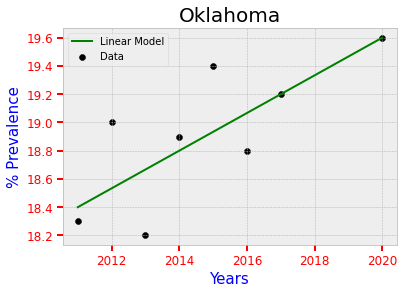

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Oregon for 2020 is 13.999999998207159
Total population in Oregon is 4217737 
Vulnerable population in Oregon is 301146
Total hospital beds in Oregon is 6,218


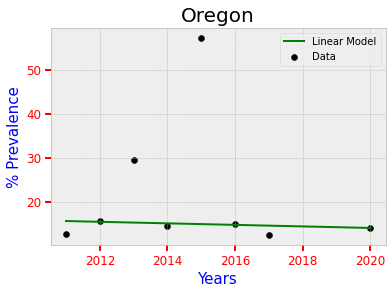

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Pennsylvania for 2020 is 16.300000000065495
Total population in Pennsylvania is 12801989 
Vulnerable population in Pennsylvania is 1064229
Total hospital beds in Pennsylvania is 34,816


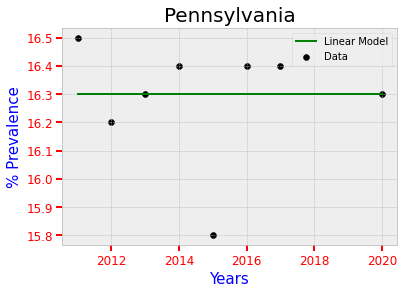

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Rhode Island for 2020 is 12.200000000347814
Total population in Rhode Island is 1059361 
Vulnerable population in Rhode Island is 65913
Total hospital beds in Rhode Island is 2,424


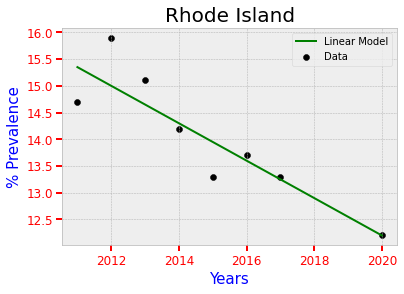

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for South Carolina for 2020 is 14.899999999691545
Total population in South Carolina is 5148714 
Vulnerable population in South Carolina is 391250
Total hospital beds in South Carolina is 11,455


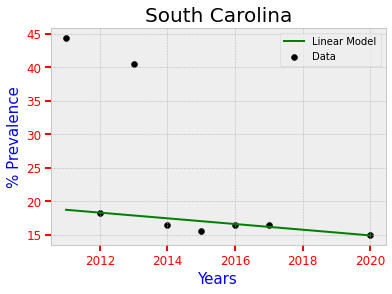

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for South Dakota for 2020 is 15.69999999970753
Total population in South Dakota is 884659 
Vulnerable population in South Dakota is 70834
Total hospital beds in South Dakota is 2,735


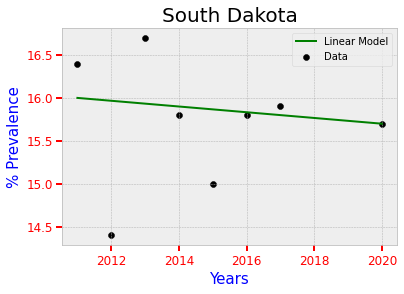

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Tennessee for 2020 is 19.8000000002329
Total population in Tennessee is 6829174 
Vulnerable population in Tennessee is 689609
Total hospital beds in Tennessee is 18,522


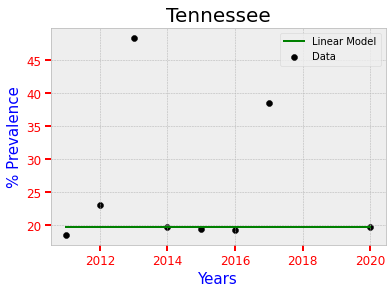

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Texas for 2020 is 13.819999999937068
Total population in Texas is 28995881 
Vulnerable population in Texas is 2043687
Total hospital beds in Texas is 58,055


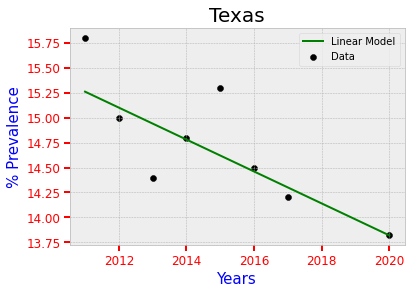

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Utah for 2020 is 8.999999999970896
Total population in Utah is 3205958 
Vulnerable population in Utah is 147153
Total hospital beds in Utah is 4,630


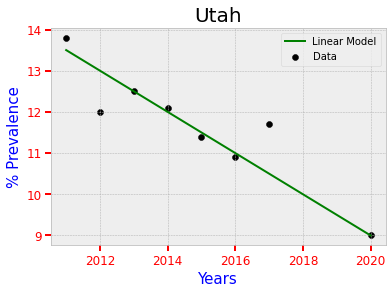

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Vermont for 2020 is 13.250000000087311
Total population in Vermont is 623989 
Vulnerable population in Vermont is 42166
Total hospital beds in Vermont is 828


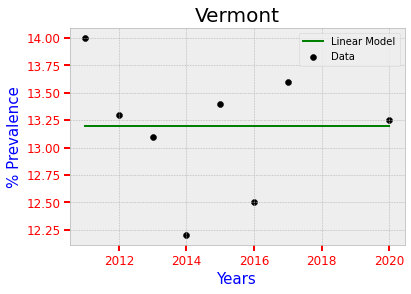

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Virginia for 2020 is 14.640000000406303
Total population in Virginia is 8535519 
Vulnerable population in Virginia is 637295
Total hospital beds in Virginia is 17,719


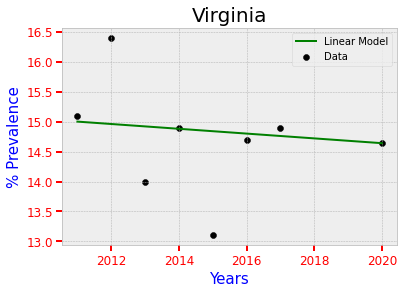

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Washington for 2020 is 12.600000000186242
Total population in Washington is 7614893 
Vulnerable population in Washington is 489333
Total hospital beds in Washington is 10,231


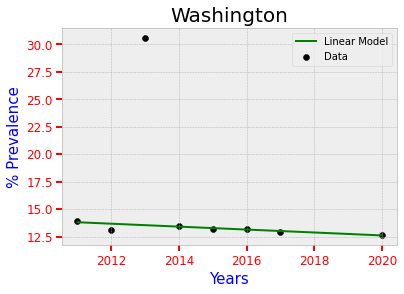

before reshape:  [2011, 2012, 2013, 2014, 2015, 2016, 2017]
after reshape:  [[2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]]
Estimated Percent of Prevalence for Washington, DC for 2020 is 12.099999999103602


IndexError: single positional indexer is out-of-bounds

In [25]:
#Plot Linear regression for the percent prevalence of heart disease in each state from the year 2011-2017 
#and predict the data for each state in 2020 by looking at the trend to estimate the number of patients that can be 
#expected in the worst case scenario during a pandemic like Covid-19

svr_lin = SVR(kernel= 'linear', C=1.0)

def predict_pprevalence(years, pprevalence, x):
    #print("before reshape: ", years)
    years = np.reshape(years , (len(years), 1))
    #print("after reshape: ", years)
    svr_lin.fit(years, pprevalence)    
    return svr_lin.predict([[x]])[0]

def plot(years, pprevalence, state): 
    years = np.reshape(years , (len(years), 1))
    svr_lin.fit(years, pprevalence)   
    plt.scatter(years, pprevalence, color = 'black', label='Data', )
    plt.plot(years, svr_lin.predict(years), color='green', label = 'Linear Model')
    
    plt.xlabel('Years', fontsize=15, color='blue')
    plt.ylabel('% Prevalence', fontsize=15, color='blue')
    plt.tick_params(labelsize='large',direction='out', length=6, width=2, colors='r')
    plt.title(state, fontsize=20, color='black')
    plt.legend()
    plt.show()
    return

estimate_df = pd.DataFrame(columns=['State', 'Staffed Beds', 'Vulnerable Population'])
iterator = 1

for state in list_of_states:
    filter_states = final_df.States.isin([state])
    state_level_data = final_df[filter_states]
    
    Years = np.array(state_level_data["Year"].to_numpy()).tolist()
    PPrevalence =  np.array(state_level_data["%_Prevalence"].to_numpy()).tolist()
    estimationYear = 2020
    estimated = predict_pprevalence(Years, PPrevalence, estimationYear)
    print("Estimated Percent of Prevalence for %s for %s is %s" % (state, estimationYear, estimated))
    Years.append(estimationYear)
    
    #print((df_population[df_population.NAME.isin([state])]))
    state_population = ((df_population.loc[df_population['NAME'] == state, 'POPESTIMATE2019'].iloc[0]))
    vulnerable_population = int(state_population * (estimated/100) *(.51))
    print("Total population in %s is %s " % (state,state_population))
    print("Vulnerable population in %s is %s" % (state, vulnerable_population ))
    
    state_hospital_beds = ((df_hospitals.loc[df_hospitals['State'] == state, 'Staffed Beds'].iloc[0]))
    print("Total hospital beds in %s is %s" % (state,state_hospital_beds))
    estimate_df = estimate_df.append({'State': state, 'Staffed Beds': state_hospital_beds, 'Vulnerable Population': vulnerable_population}, ignore_index=True)
    
    PPrevalence.append(estimated)
    plot(Years, PPrevalence, state)



In [26]:
#created a table of all the states with the number of staffed beds and vulneable population

estimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   State                  47 non-null     object
 1   Staffed Beds           47 non-null     object
 2   Vulnerable Population  47 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


In [27]:
estimate_df

State Staffed Beds Vulnerable Population
0          Alabama       15,542                503625
1           Alaska        1,235                 38801
2          Arizona       13,296                471442
3         Arkansas        7,848                345369
4       California       74,186               2115879
5         Colorado        8,243                350966
6      Connecticut        8,847                221468
7         Delaware        2,072                 68699
8          Florida       55,727               1588278
9          Georgia       22,344                936775
10          Hawaii        2,583                 80874
11           Idaho        2,470                116477
12        Illinois       28,953                794903
13         Indiana       16,084                561022
14            Iowa        6,266                648461
15          Kansas        6,466                196124
16        Kentucky       13,799                518361
17       Louisiana       14,989                460544
18           Maine        2,893                104203
19        Maryland       10,806                367528
20   Massachusetts       15,193                471033
21        Michigan       23,819                865860
22       Minnesota       10,518                310630
23     Mississippi        9,970                304326
24        Missouri       16,712                542287
25         Montana        2,202                 56415
26        Nebraska        4,225                129237
27          Nevada        5,726                246628
28   New Hampshire        2,266                 71425
29      New Jersey       20,207                546987
30      New Mexico        3,917                136880
31        New York       57,261               1269928
32  North Carolina       23,194                794315
33    North Dakota        2,003                 55965
34            Ohio       27,185                957407
35        Oklahoma       10,312                395538
36          Oregon        6,218                301146
37    Pennsylvania       34,816               1064229
38    Rhode Island        2,424                 65913
39  South Carolina       11,455                391250
40    South Dakota        2,735                 70834
41       Tennessee       18,522                689609
42           Texas       58,055               2043687
43            Utah        4,630                147153
44         Vermont          828                 42166
45        Virginia       17,719                637295
46      Washington       10,231                489333

In [54]:
# fig = px.bar(estimate_df, x='State', y='Vulnerable Population',
#              hover_data=['Staffed Beds'], color='Staffed Beds',
#              labels={'Vulnerable Population':'Vulnerable Population'}, height=400, )
# fig.show()



fig = px.bar(estimate_df, y='Vulnerable Population', x='State', text='Vulnerable Population')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='show')
fig.show()


In [31]:
#export the vulnerability population table created to a csv to remove the ',' delimiter from the number of staffed beds

compression_opts = dict(method='zip',archive_name='estimate_df.csv') 
estimate_df.to_csv('estimate_df.zip', index=False,compression=compression_opts)

In [33]:
estimate_df_1 = pd.read_csv('estimate_df.csv')
estimate_df_1.head()
estimate_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   State                  47 non-null     object
 1   Staffed Beds           47 non-null     object
 2   Vulnerable Population  47 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [48]:
df_est_locAbb = pd.read_csv('estimate_df_LocAbbr.csv')

fig = go.Figure(data=go.Choropleth(
    locations=df_est_locAbb['LocationAbbr'], # Spatial coordinates
    z = estimate_df_1['Vulnerable Population'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "% Vulnerability",
))

fig.update_layout(
    title_text = '% Vulnerable during Covid19',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

In [49]:
X= df_est_locAbb.iloc[:, [1,2]].values

In [50]:
#create a K-Mean cluster of the number of staffed beds against the total number of vulnerable population

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

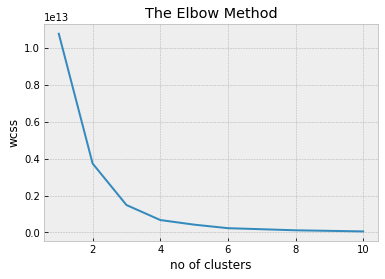

In [51]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [52]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

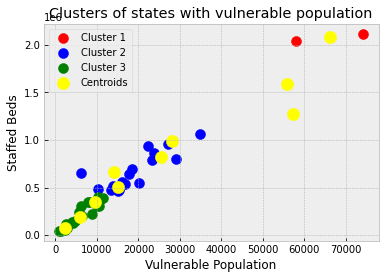

In [53]:
#plot the cluster of states with vulnerability

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')

plt.title('Clusters of states with vulnerable population')
plt.xlabel('Vulnerable Population')
plt.ylabel('Staffed Beds')
plt.legend()
plt.show()